In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END, START

In [2]:
class ConditonalAgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [27]:
def adder(state: ConditonalAgentState) -> ConditonalAgentState:
    """This node adds the 2 numbers"""
    state['finalNumber'] = state['number1'] + state['number2'] 
    return state

def multiplier(state: ConditonalAgentState) -> ConditonalAgentState:
    """This node multiplies the 2 numbers"""    
    state['finalNumber'] = state['number1'] * state['number2'] 
    return state

def decide_next_node(state: ConditonalAgentState) -> ConditonalAgentState:
    """This node will select the next node of the graph """
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "*":
        return "multiplier_operation"

In [28]:
graph = StateGraph(ConditonalAgentState)

graph.add_node("add_node", adder)
graph.add_node("multiplier_node", multiplier)
graph.add_node("router", lambda state: state) # passthrough fucntion

graph.add_edge(START, "router")

graph.add_conditional_edges("router", decide_next_node, path_map={"addition_operation": "add_node", "multiplier_operation": "multiplier_node"})

graph.add_edge("add_node", END)
graph.add_edge("multiplier_node", END)

app = graph.compile()


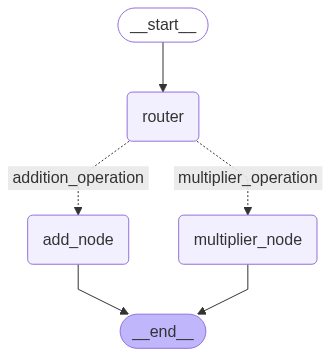

In [29]:
# %%
# In[11]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
print(app.invoke({"number1": 2, "operation": "*", "number2": 3}))


{'number1': 2, 'operation': '*', 'number2': 3, 'finalNumber': 6}
